In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df=pd.read_csv("airlines_delay.csv")

In [ ]:
df.head()

,Flight,Time,Length,Airline,AirportFrom,AirportTo,DayOfWeek,Class
0,2313.0,1296.0,141.0,DL,ATL,HOU,1,0
1,6948.0,360.0,146.0,OO,COS,ORD,4,0
2,1247.0,1170.0,143.0,B6,BOS,CLT,3,0
3,31.0,1410.0,344.0,US,OGG,PHX,6,0
4,563.0,692.0,98.0,FL,BMI,ATL,4,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539382 entries, 0 to 539381
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Flight       539382 non-null  float64
 1   Time         539382 non-null  float64
 2   Length       539382 non-null  float64
 3   Airline      539382 non-null  object 
 4   AirportFrom  539382 non-null  object 
 5   AirportTo    539382 non-null  object 
 6   DayOfWeek    539382 non-null  int64  
 7   Class        539382 non-null  int64  
dtypes: float64(3), int64(2), object(3)
memory usage: 32.9+ MB


In [ ]:
df.describe()

,Flight,Time,Length,DayOfWeek,Class
count,539382.000000,539382.000000,539382.000000,539382.000000,539382.000000
mean,2427.927988,802.728161,132.202104,3.929666,0.445443
std,2067.431700,278.045546,70.117045,1.914666,0.497015
min,1.000000,10.000000,0.000000,1.000000,0.000000
25%,712.000000,565.000000,81.000000,2.000000,0.000000
50%,1809.000000,795.000000,115.000000,4.000000,0.000000
75%,3745.000000,1035.000000,162.000000,5.000000,1.000000
max,7814.000000,1439.000000,655.000000,7.000000,1.000000


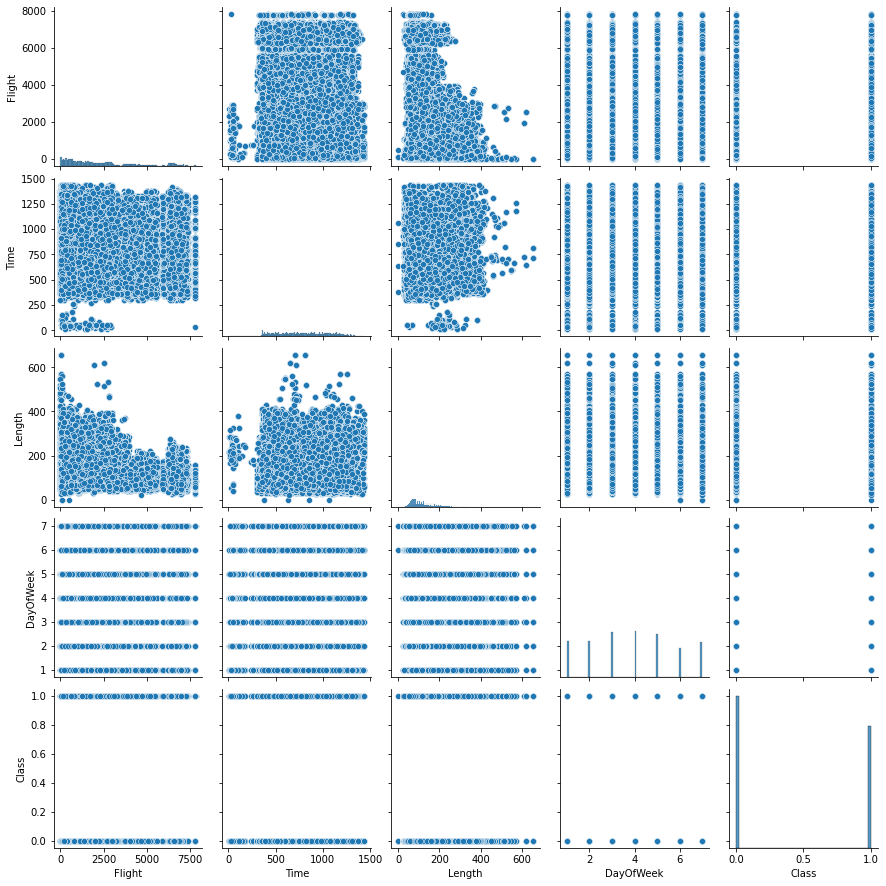

In [ ]:
sns.pairplot(data=df)

In [ ]:
x=df.iloc[:,0:-1]
x

,Flight,Time,Length,Airline,AirportFrom,AirportTo,DayOfWeek
0,2313.0,1296.0,141.0,DL,ATL,HOU,1
1,6948.0,360.0,146.0,OO,COS,ORD,4
2,1247.0,1170.0,143.0,B6,BOS,CLT,3
3,31.0,1410.0,344.0,US,OGG,PHX,6
4,563.0,692.0,98.0,FL,BMI,ATL,4
...,...,...,...,...,...,...,...
539377,6973.0,530.0,72.0,OO,GEG,SEA,5
539378,1264.0,560.0,115.0,WN,LAS,DEN,4
539379,5209.0,827.0,74.0,EV,CAE,ATL,2
539380,607.0,715.0,65.0,WN,BWI,BUF,4


In [ ]:
y=df.iloc[:,-1]
y

0         0
1         0
2         0
3         0
4         0
         ..
539377    1
539378    1
539379    1
539380    1
539381    1
Name: Class, Length: 539382, dtype: int64

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()

In [ ]:
x[["Airline","AirportFrom","AirportTo"]]=oe.fit_transform(x[["Airline","AirportFrom","AirportTo"]])

In [ ]:
x.head()

,Flight,Time,Length,Airline,AirportFrom,AirportTo,DayOfWeek
0,2313.0,1296.0,141.0,5.0,16.0,129.0,1
1,6948.0,360.0,146.0,12.0,65.0,208.0,4
2,1247.0,1170.0,143.0,3.0,35.0,60.0,3
3,31.0,1410.0,344.0,14.0,203.0,217.0,6
4,563.0,692.0,98.0,8.0,32.0,16.0,4


In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,random_state=1,test_size=0.30)

In [ ]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(xtrain,ytrain)
ypred=lr.predict(xtest)

In [ ]:
from sklearn.metrics import classification_report
cr=classification_report(ytest,ypred)
print(cr)

              precision    recall  f1-score   support

           0       0.58      0.77      0.66     89585
           1       0.53      0.32      0.40     72230

    accuracy                           0.57    161815
   macro avg       0.56      0.55      0.53    161815
weighted avg       0.56      0.57      0.55    161815



In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
xtrain=sc.fit_transform(xtrain)
xtest=sc.transform(xtest)

In [ ]:
import tensorflow as tf

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

In [ ]:
ann = Sequential()
ann.add(Dense(units=20,activation='relu'))
ann.add(Dense(units=10,activation='relu'))
ann.add(Dense(units=8,activation='relu'))
ann.add(Dense(1,activation='sigmoid')) 

ann.compile(optimizer='sgd',loss='binary_crossentropy',metrics=['accuracy'])
ann.fit(xtrain,ytrain,epochs=500,validation_data=(xtest, ytest),verbose=1,batch_size=25,callbacks=[early_stop])

Epoch 1/500
15103/15103 [==============================] - 42s 3ms/step - loss: 0.6702 - accuracy: 0.5841 - val_loss: 0.6654 - val_accuracy: 0.5903
Epoch 2/500
15103/15103 [==============================] - 42s 3ms/step - loss: 0.6638 - accuracy: 0.5933 - val_loss: 0.6623 - val_accuracy: 0.5963
Epoch 3/500
15103/15103 [==============================] - 40s 3ms/step - loss: 0.6603 - accuracy: 0.5984 - val_loss: 0.6585 - val_accuracy: 0.6000
Epoch 4/500
15103/15103 [==============================] - 39s 3ms/step - loss: 0.6563 - accuracy: 0.6042 - val_loss: 0.6538 - val_accuracy: 0.6070
Epoch 5/500
15103/15103 [==============================] - 40s 3ms/step - loss: 0.6517 - accuracy: 0.6092 - val_loss: 0.6488 - val_accuracy: 0.6125
Epoch 6/500
15103/15103 [==============================] - 41s 3ms/step - loss: 0.6467 - accuracy: 0.6163 - val_loss: 0.6429 - val_accuracy: 0.6234
Epoch 7/500
15103/15103 [==============================] - 40s 3ms/step - loss: 0.6396 - accuracy: 0.6303 - val_

In [ ]:
ann.history.history


{'loss': [0.6702026128768921,
  0.6638303399085999,
  0.6603161096572876,
  0.6562975645065308,
  0.6516970992088318,
  0.6466774344444275,
  0.6395577192306519,
  0.6352083086967468,
  0.6340627074241638,
  0.6332112550735474,
  0.6327913999557495,
  0.6323983073234558,
  0.6320062279701233,
  0.6317397952079773,
  0.6314365863800049,
  0.6313040852546692,
  0.6311260461807251,
  0.6309014558792114,
  0.6307233572006226,
  0.6305812001228333,
  0.6305546164512634,
  0.6303495764732361,
  0.6303120851516724,
  0.6301522254943848,
  0.6300886273384094,
  0.630097508430481,
  0.6299684643745422,
  0.6299362182617188,
  0.6298805475234985,
  0.6297402381896973,
  0.6296933889389038,
  0.6296061277389526,
  0.6296047568321228,
  0.6294905543327332,
  0.6294233202934265,
  0.6293635964393616,
  0.6292186379432678,
  0.6293268203735352,
  0.6292611956596375,
  0.6291966438293457,
  0.6291178464889526,
  0.6292058229446411,
  0.6290874481201172,
  0.6290252804756165,
  0.6290324926376343,
  0

<Axes: >

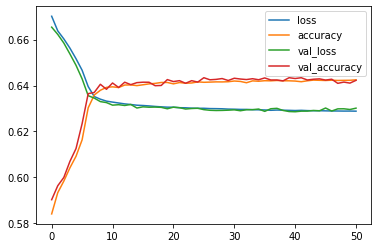

In [ ]:
lossdf=pd.DataFrame(ann.history.history)
lossdf.plot()


In [ ]:
ypred=ann.predict(xtest)
ypred=ypred>0.5

5057/5057 [==============================] - 10s 2ms/step


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(ytest,ypred))


              precision    recall  f1-score   support

           0       0.64      0.83      0.72     89585
           1       0.66      0.41      0.50     72230

    accuracy                           0.64    161815
   macro avg       0.65      0.62      0.61    161815
weighted avg       0.65      0.64      0.62    161815



In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=60, max_depth=10)
rf.fit(xtrain, ytrain)

y_pred = rf.predict(xtest)


In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(ytest,ypred))



0.6422766739795446
